In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras import regularizers

In [2]:
# Directorios de datos
base_dir = r"C:\Users\Flavio Ruvalcaba\Documents\Escuela\Universidad\7_Semestre\inputData\faces"
train_dir = os.path.join(base_dir, 'train')  # Directorio de entrenamiento
validation_dir = os.path.join(base_dir, 'validation')  # Directorio de validación
test_dir = os.path.join(base_dir, 'test')  # Directorio de prueba

In [3]:
# Configuración del generador de imágenes de entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Configuración del generador de imágenes de validación sin aumento de datos
val_datagen = ImageDataGenerator(1./255)

In [4]:
# Generadores de imágenes para entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 19016 images belonging to 2 classes.
Found 2719 images belonging to 2 classes.


In [5]:
# Creación de la base convolucional utilizando VGG16 pre-entrenada
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [6]:
# Creación del modelo secuencial
model = models.Sequential()

# Agregando la base convolucional a la red
model.add(conv_base)

# Aplanando la salida de la base convolucional
model.add(layers.Flatten())

# Agregando una capa densa con 256 neuronas y función de activación ReLU
model.add(layers.Dense(256, activation='relu'))

# Agregando una capa de salida con 1 neurona y función de activación sigmoide
model.add(layers.Dense(1, activation='sigmoid'))

# Resumen del modelo
model.summary()

# Congelar las capas de la base convolucional (no se entrenarán)
conv_base.trainable = False

# Compilar el modelo con la función de pérdida, optimizador y métricas
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Entrenar el modelo utilizando los generadores de imágenes de entrenamiento y validación
history = model.fit(
    train_generator,
    steps_per_epoch=75,
    epochs=10,
    validation_data=val_generator,
    validation_steps=25
)

Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.5642 - acc: 0.7147

C:\Users\Flavio Ruvalcaba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


75/75 [==============================] - 67s 887ms/step - loss: 0.5642 - acc: 0.7147 - val_loss: 2.3286 - val_acc: 0.7680
Epoch 2/10
75/75 [==============================] - 65s 873ms/step - loss: 0.5056 - acc: 0.7653 - val_loss: 3.1669 - val_acc: 0.7400
Epoch 3/10
75/75 [==============================] - 70s 937ms/step - loss: 0.4701 - acc: 0.7887 - val_loss: 3.3340 - val_acc: 0.7860
Epoch 4/10
75/75 [==============================] - 65s 865ms/step - loss: 0.4438 - acc: 0.8047 - val_loss: 2.7826 - val_acc: 0.8000
Epoch 5/10
75/75 [==============================] - 67s 899ms/step - loss: 0.4221 - acc: 0.8027 - val_loss: 3.3109 - val_acc: 0.8000
Epoch 6/10
75/75 [==============================] - 68s 907ms/step - loss: 0.4413 - acc: 0.8093 - val_loss: 3.7198 - val_acc: 0.8320
Epoch 7/10
75/75 [==============================] - 66s 886ms/step - loss: 0.4312 - acc: 0.8060 - val_loss: 2.6503 - val_acc: 0.8660
Epoch 8/10
75/75 [==============================] - 66s 886ms/step - loss: 0.414

In [9]:
# Extraer historias de entrenamiento
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

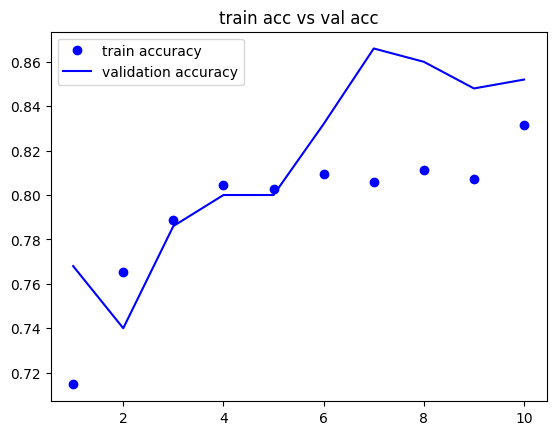

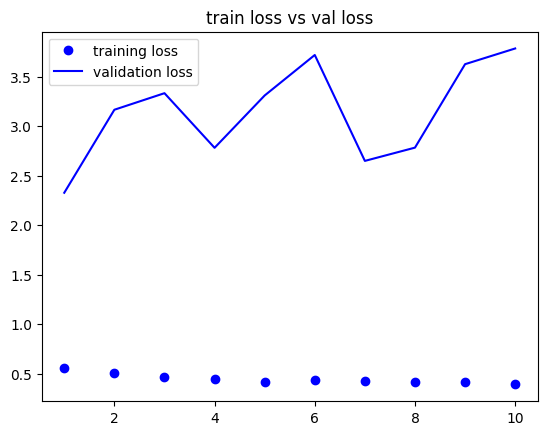

In [10]:
# Graficar la precisión de entrenamiento y validación
plt.plot(epochs, acc, 'bo', label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

# Graficar la pérdida de entrenamiento y validación
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

# Mostrar las gráficas
plt.show()

In [11]:
# Configuración del generador de imágenes de prueba sin aumento de datos
test_datagen = ImageDataGenerator(1./255)

# Generador de imágenes para pruebas
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 5432 images belonging to 2 classes.


In [12]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator, steps=25)

# Imprimir la precisión en el conjunto de prueba
print('\ntest acc :\n', test_acc)

25/25 [==============================] - 15s 605ms/step - loss: 2.9811 - acc: 0.8660

test acc :
 0.8659999966621399


In [36]:
# Creación del modelo secuencial
model = models.Sequential()

# Agregando la base convolucional a la red
model.add(conv_base)

# Aplanando la salida de la base convolucional
model.add(layers.Flatten())

# Agregando una capa densa con 256 neuronas y función de activación ReLU con regularización L2
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Agregando una capa de salida con 1 neurona y función de activación sigmoide
model.add(layers.Dense(1, activation='sigmoid'))

# Resumen del modelo
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               2097408   
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [38]:
conv_base.trainable = False

# Compilar el modelo con la función de pérdida, optimizador y métricas
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

# Entrenar el modelo utilizando los generadores de imágenes de entrenamiento y validación
history = model.fit(
    train_generator,
    steps_per_epoch=80,
    epochs=10,
    validation_data=val_generator,
    validation_steps=30
)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 1.0310 - acc: 0.7356

C:\Users\Flavio Ruvalcaba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


80/80 [==============================] - 75s 935ms/step - loss: 1.0310 - acc: 0.7356 - val_loss: 2.9620 - val_acc: 0.7783
Epoch 2/10
80/80 [==============================] - 75s 944ms/step - loss: 0.9640 - acc: 0.7713 - val_loss: 2.8164 - val_acc: 0.8167
Epoch 3/10
80/80 [==============================] - 64s 800ms/step - loss: 0.9452 - acc: 0.7881 - val_loss: 2.8965 - val_acc: 0.8417
Epoch 4/10
80/80 [==============================] - 68s 845ms/step - loss: 0.9257 - acc: 0.7969 - val_loss: 2.9678 - val_acc: 0.8633
Epoch 5/10
80/80 [==============================] - 65s 819ms/step - loss: 0.8947 - acc: 0.8069 - val_loss: 4.0259 - val_acc: 0.8250
Epoch 6/10
80/80 [==============================] - 66s 821ms/step - loss: 0.9035 - acc: 0.8000 - val_loss: 3.9128 - val_acc: 0.8400
Epoch 7/10
80/80 [==============================] - 68s 851ms/step - loss: 0.8731 - acc: 0.8144 - val_loss: 3.8986 - val_acc: 0.8417
Epoch 8/10
80/80 [==============================] - 70s 873ms/step - loss: 0.846

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

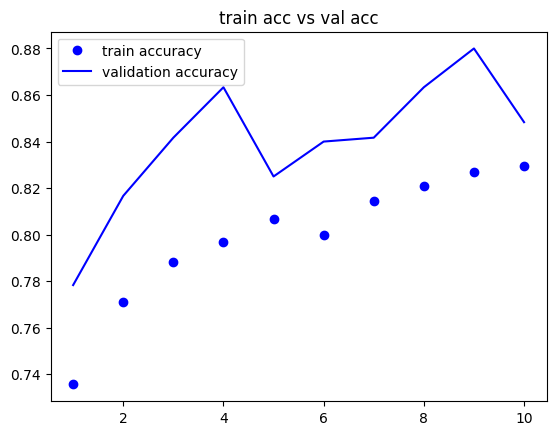

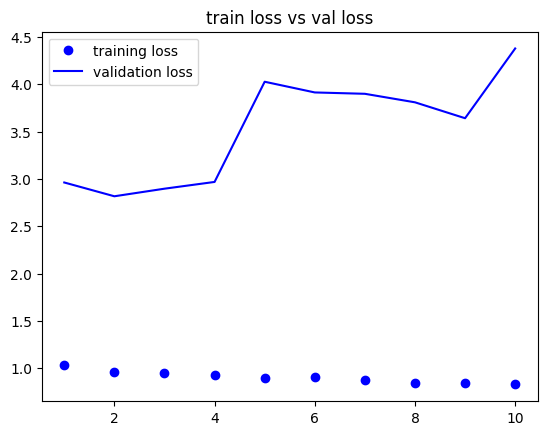

In [41]:
# Graficar la precisión de entrenamiento y validación
plt.plot(epochs, acc, 'bo', label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

# Graficar la pérdida de entrenamiento y validación
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

# Mostrar las gráficas
plt.show()

In [8]:
# Guardar el modelo en dos formatos diferentes
model.save('vgg_man_woman_model.h5')
model.save('vgg_man_woman_model.keras')

C:\Users\Flavio Ruvalcaba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
